In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generate a binary classification data

from sklearn.datasets import make_blobs

X_blobs, Y_blobs = make_blobs(n_samples=400, centers=2,
                              n_features=2, random_state=42,
                              cluster_std=2)

print("X =", X_blobs.shape, "Y = ", Y_blobs.shape)

X = (400, 2) Y =  (400,)


In [3]:
print(Y_blobs[:10])

[1 1 1 0 1 1 1 0 0 0]


Text(0.5, 0, '$X$')

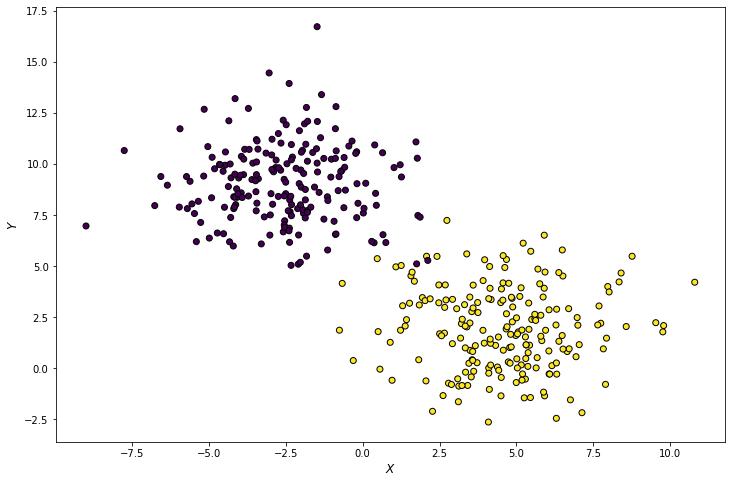

In [4]:
# Visualize the data

plt.figure(figsize=(12, 8))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=Y_blobs, edgecolor="black")
plt.ylabel("$Y$", size=12)
plt.xlabel("$X$", size=12)

In [5]:
# Use K-Nearest-Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_blobs, Y_blobs)

KNeighborsClassifier(n_neighbors=2)

In [6]:
y_pred = knn.predict(X_blobs)
print(y_pred)

[1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1
 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0
 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0
 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1
 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0]


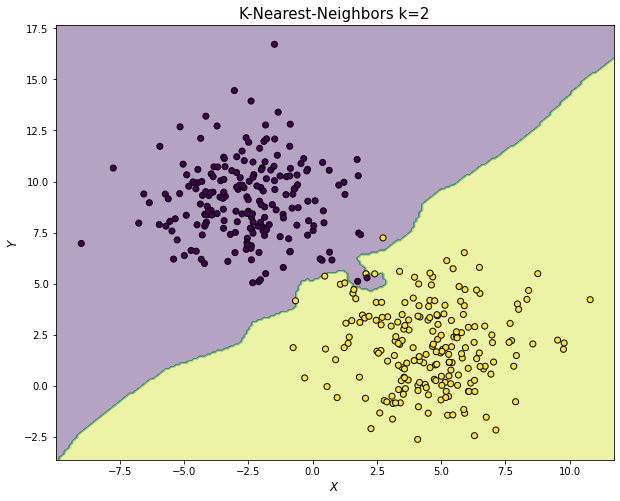

In [7]:
# Create a decision boundary
x_min, x_max = X_blobs[:, 0].min() - 1, X_blobs[:, 0].max() + 1
y_min, y_max = X_blobs[:, 1].min() - 1, X_blobs[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X_blobs[:, 0], X_blobs[:, 1], c=Y_blobs, edgecolor="k")
ax.set_ylabel("$Y$", size=12)
ax.set_xlabel("$X$", size=12)
ax.set_title("K-Nearest-Neighbors k=2", size=15)
#plt.savefig("knn_blobs.pdf",dpi = 300, bbox_inches="tight")
plt.show()

In [8]:
# Great accuracy but this will be massive overfitting
print("score:", knn.score(X_blobs, Y_blobs))

score: 0.995


# Fundamental Clustering Problem Suite (FCPS)
## Target-Dataset

In [9]:
# Some data preperation on Target-Dataset
features = open("../data/Target.lrn", "r")
labels = open("../data/Target.cls", "r")

X_target=[]
for x in features:
  X_target.append(x.split("\t"))

Y_target=[]
for y in labels:
  Y_target.append(y.split("\t"))

X_target = np.array(X_target[4:]).astype(np.float)
Y_target = np.array(Y_target[1:]).astype(np.float)

print(X_target[:2])
print(Y_target[:2])

[[ 1. -3. -3.]
 [ 2. -3.  3.]]
[[1. 5.]
 [2. 4.]]


In [10]:
# Remove the first rows
X_target = np.delete(X_target, 0, 1)
Y_target = np.delete(Y_target, 0, 1)

print("X:",X_target.shape)
print("Y:",Y_target.shape)

X: (770, 2)
Y: (770, 1)


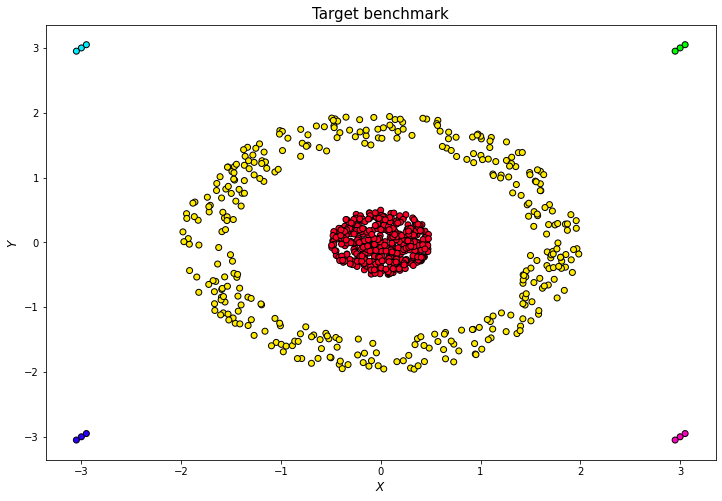

In [11]:
import matplotlib.cm as cm

plt.figure(figsize=(12, 8))
plt.scatter(X_target[:, 0], X_target[:, 1], 
            c=Y_target, edgecolor="black",
            cmap=cm.gist_rainbow)
plt.ylabel("$Y$", size=12)
plt.xlabel("$X$", size=12)
plt.title("Target benchmark", size=15)
plt.show()

In [12]:
# Try K-Nearest-Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_target, Y_target)

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred = knn.predict(X_target)
print(y_pred)

[5. 4. 6. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

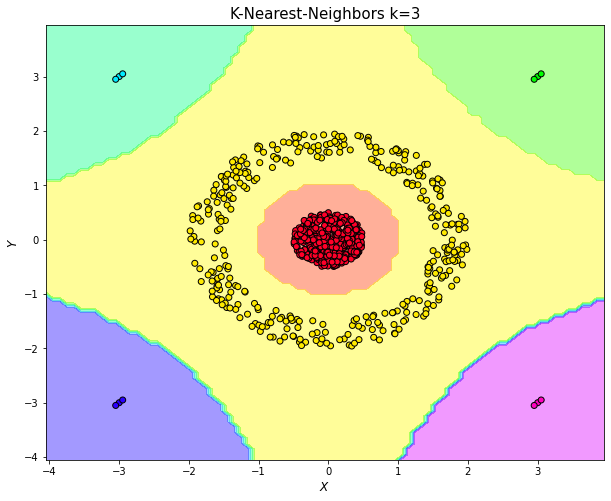

In [14]:
x_min, x_max = X_target[:, 0].min() - 1, X_target[:, 0].max() + 1
y_min, y_max = X_target[:, 1].min() - 1, X_target[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4, cmap=cm.gist_rainbow)
ax.scatter(X_target[:, 0], X_target[:, 1],
           c=Y_target, edgecolor="k",
           cmap=cm.gist_rainbow)
ax.set_ylabel("$Y$", size=12)
ax.set_xlabel("$X$", size=12)
ax.set_title("K-Nearest-Neighbors k=3", size=15)
#plt.savefig("knn_target.pdf",dpi = 300, bbox_inches="tight")
plt.show()

In [15]:
# 100% Overfitting
print("score:", knn.score(X_target, Y_target))

score: 1.0


## EngyTime-Dataset

In [16]:
# Some data preperation on EngyTime-Dataset
features = open("../data/EngyTime.lrn", "r")
labels = open("../data/EngyTime.cls", "r")

X_engy=[]
for x in features:
  X_engy.append(x.split("\t"))

Y_engy=[]
for y in labels:
  Y_engy.append(y.split("\t"))

X_engy = np.array(X_engy[4:]).astype(np.float)
Y_engy = np.array(Y_engy[1:]).astype(np.float)

print(X_engy[:2])
print(Y_engy[:2])

[[1.       1.388261 2.076096]
 [2.       2.177247 3.102304]]
[[1. 1.]
 [2. 1.]]


In [17]:
# Remove the first rows
X_engy = np.delete(X_engy, 0, 1)
Y_engy = np.delete(Y_engy, 0, 1)

print("X:",X_engy.shape)
print("Y:",Y_engy.shape)

X: (4096, 2)
Y: (4096, 1)


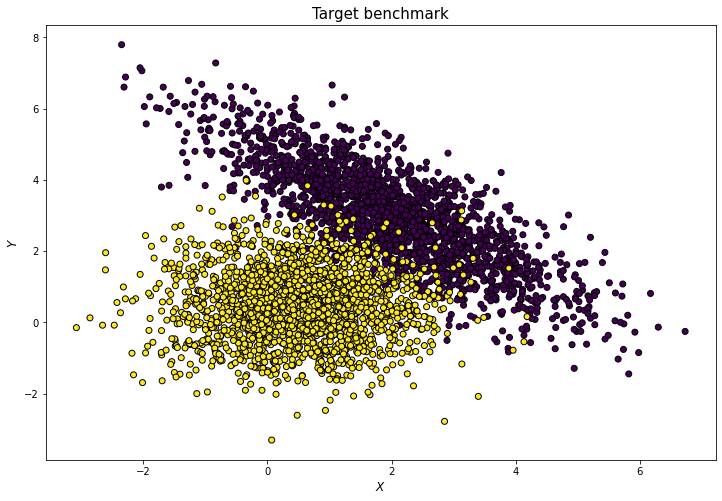

In [18]:
plt.figure(figsize=(12, 8))
plt.scatter(X_engy[:, 0], X_engy[:, 1], 
            c=Y_engy, edgecolor="black")
plt.ylabel("$Y$", size=12)
plt.xlabel("$X$", size=12)
plt.title("Target benchmark", size=15)
plt.show()

In [19]:
# Try K-Nearest-Neighbor
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_engy, Y_engy)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred = knn.predict(X_engy)
print(y_pred)

[2. 1. 1. ... 2. 2. 2.]


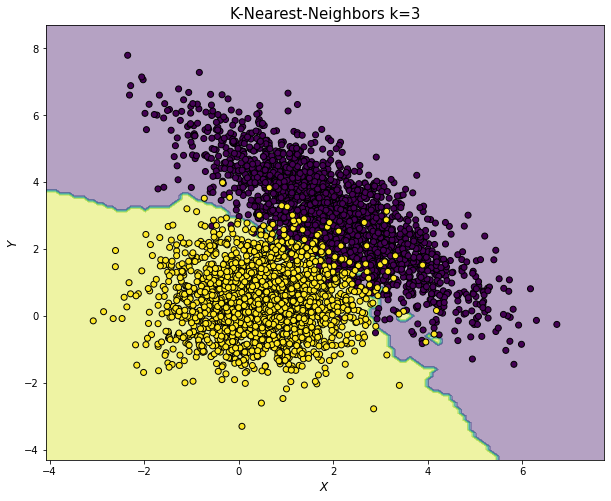

In [21]:
x_min, x_max = X_engy[:, 0].min() - 1, X_engy[:, 0].max() + 1
y_min, y_max = X_engy[:, 1].min() - 1, X_engy[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X_engy[:, 0], X_engy[:, 1],
           c=Y_engy, edgecolor="k")
ax.set_ylabel("$Y$", size=12)
ax.set_xlabel("$X$", size=12)
ax.set_title("K-Nearest-Neighbors k=3", size=15)
#plt.savefig("knn_engy.pdf",dpi = 300, bbox_inches="tight")
plt.show()

In [22]:
print("score:", knn.score(X_engy, Y_engy))

score: 0.974365234375
